# Warm-up

In [ ]:
!apt-get install valgrind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1
Suggested packages:
  gdb-doc valgrind-dbg valgrind-mpi kcachegrind alleyoop valkyrie
The following NEW packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1 valgrind
0 upgraded, 6 newly installed, 0 to remove and 22 not upgraded.
Need to get 44.2 MB of archives.
After this operation, 132 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libdw1 amd64 0.176-1.1build1 [226 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libbabeltrace1 amd64 1.5.8-1build1 [156 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 gdb amd64 9.2-0ubuntu1~20.04.1 [3,222 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 gdbserver amd64 9.2-0ubuntu1~20.04.1 [222 kB]
Get:5 http://archive.ubuntu.com/ubuntu 

In [ ]:
!apt-get install kcachegrind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  kio kwayland-data kwayland-integration libdbusmenu-qt5-2 libfam0 libgpgme11
  libgpgmepp6 libhfstospell10 libkf5archive5 libkf5attica5 libkf5auth-data
  libkf5authcore5 libkf5codecs-data libkf5codecs5 libkf5completion-data
  libkf5completion5 libkf5config-bin libkf5config-data libkf5configcore5
  libkf5configgui5 libkf5configwidgets-data libkf5configwidgets5
  libkf5coreaddons-data libkf5coreaddons5 libkf5crash5 libkf5dbusaddons-bin
  libkf5dbusaddons-data libkf5dbusaddons5 libkf5doctools5
  libkf5globalaccel-bin libkf5globalaccel-data libkf5globalaccel5
  libkf5globalaccelprivate5 libkf5guiaddons5 libkf5i18n-data libkf5i18n5
  libkf5iconthemes-bin libkf5iconthemes-data libkf5iconthemes5 libkf5idletime5
  libkf5itemviews-data libkf5itemviews5 libkf5jobwidgets-data
  libkf5jobwidgets5 libkf5kiocore5 libkf5kiontlm5 libkf5kiowidgets5
  libk

In [ ]:
%%writefile sum.cpp

#include<iostream>
#include<algorithm>
using namespace std;

constexpr int M = 2048; //linhas
constexpr int N = 2048; //colunas

double naive_sum(const double a[][N]){
    double sum = 0.0;
    for(int j = 0; j < N; ++j) {
        for(int i = 0; i < M; ++i)
            sum += a[i][j];
    }
    return sum;
}

double improved_sum(const double a[][N]) {
    double sum = 0.0;
    for(int i = 0; i < M; ++i)
        for(int j = 0; j < N; ++j)
            sum +=a[i][j];
    return sum;
}

int main() {
    static double a[M][N];
    fill_n(&a[0][0], M*N, 1.0 / (M*N));
    cout << naive_sum(a) << endl;
    static double b[M][N];
    fill_n(&b[0][0], M*N, 1.0 / (M*N));
    cout << improved_sum(b) << endl;
    return 0;
}

Writing sum.cpp


In [ ]:
!g++ -Wall -O3 -g sum.cpp -o sum

Obs. na compilação:
- Wall: mostra todos os warnings
- -03: Nivel de execução 3
- g: insrrumentar o codigo
- sum.cpp: nome arquivo
- sum: nome executavel

In [ ]:
!valgrind --tool=callgrind ./sum

==2884== Callgrind, a call-graph generating cache profiler
==2884== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==2884== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==2884== Command: ./sum
==2884== 
==2884== For interactive control, run 'callgrind_control -h'.
1
1
==2884== 
==2884== Events    : Ir
==2884== Collected : 50671211
==2884== 
==2884== I   refs:      50,671,211


**Obs.:**
- IR: requisições
- quantidade de chamadas de instruções:  50,669,201
- ls para ver os arquivos que ele gerou

In [ ]:
!ls

callgrind.out.4434  sample_data  sum  sum.cpp


Obs.:  mudar o PID do callgrind.out pro PID que apareceu anteriormente

In [ ]:
!callgrind_annotate callgrind.out.4434 sum.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.4434' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 10870009
Trigger: Program termination
Profiled target:  ./sum (PID 4434, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   sum.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
50,669,201  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir          file:function
--------------------------------------------------------------------------------
31,479,818  sum.cpp:main [/content/sum]
16,777,221  /usr/include/c++/9/bits/stl_algobase

**Obs.:**
- O número do lado representa a quantidade de requisições. Por exemplo, 12,587,008 requisições em um dos for
- consegue aproveitar melhor na versão improved. Dependendo do tamanha doa matriz pode estar ocupando mais do que um Data Segment
- inc(DX): acrescenta em 1 o valor do registrador. É oq acontece com o impreved. No caso do naive, é necessário mais do que um inc(DX) para descer a coluna

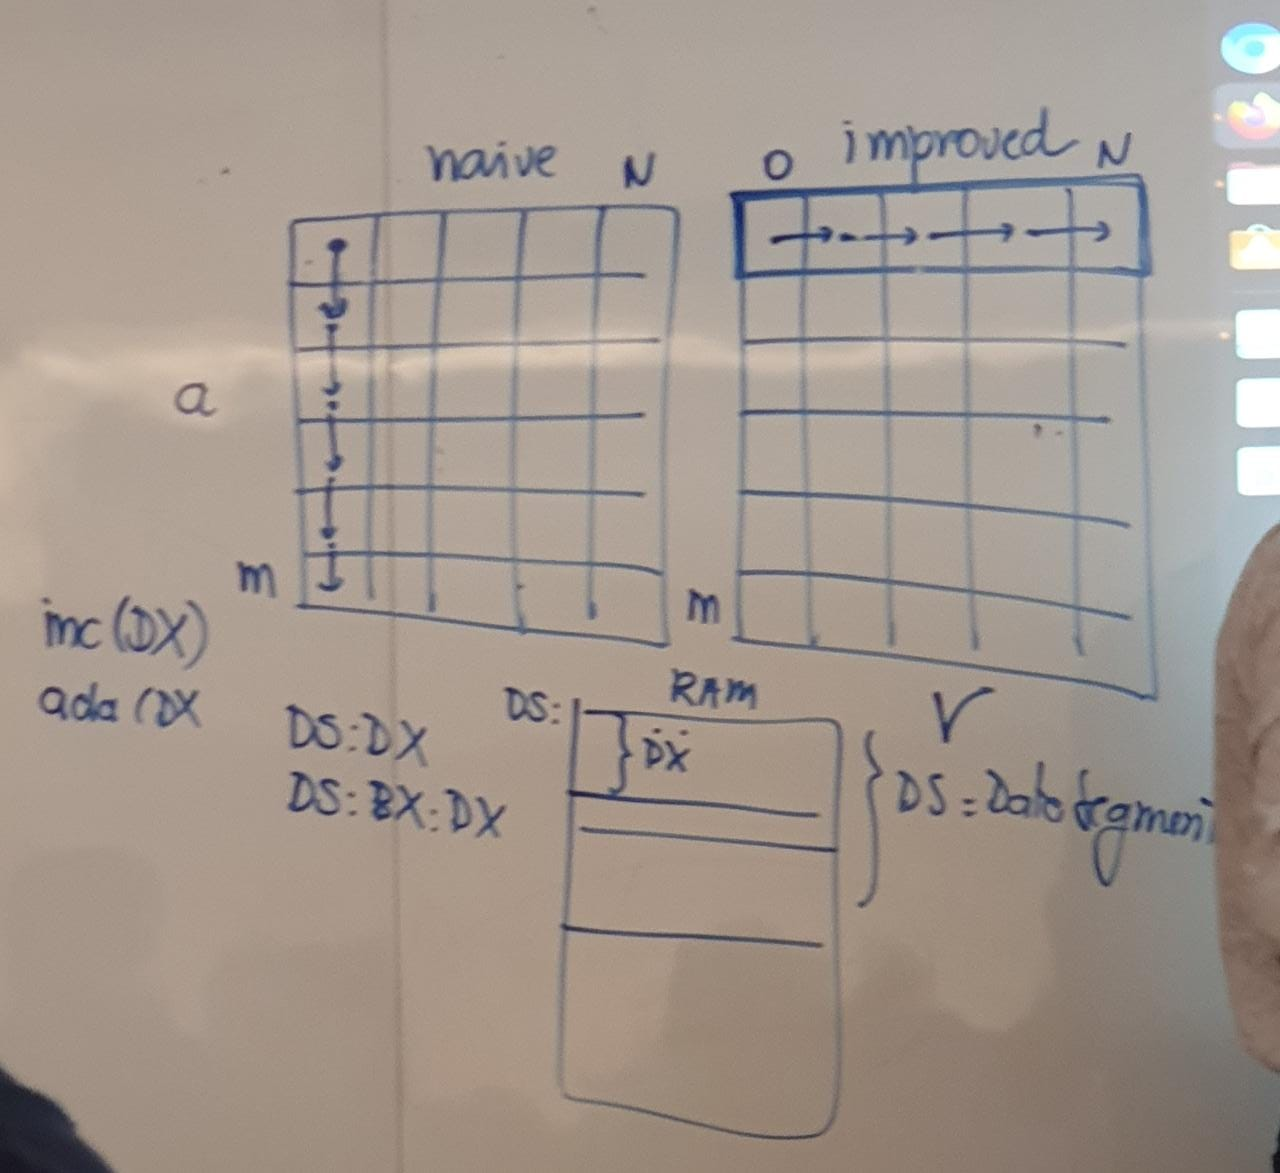

### Outra coisa a observar:


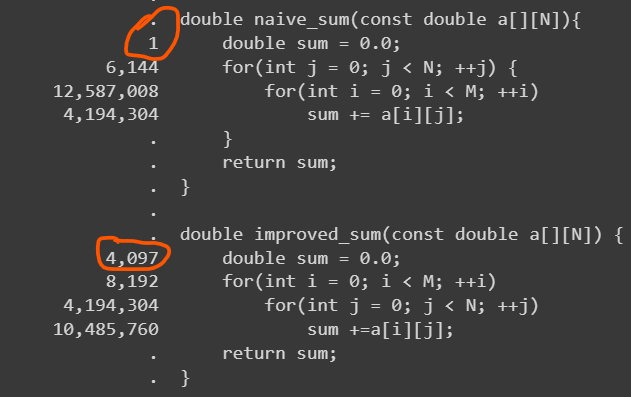

**Obs.:** O improved usa muito mais requisições do que o naive, que usa só uma. Suposições:
- sum ta na memoria o tempo todo
- poder ter caído numa paginação

**Solução**: Colocar register. Pede para o compilador, ao invés de ficar na stack/pilha, coloca o sum alocada dentro de um registrador. Como ta dentro do processador, não da problema do sum ficar entrando e saindo da memória RAM (paginação). 

In [ ]:
%%writefile sum.cpp

#include<iostream>
#include<algorithm>
using namespace std;

constexpr int M = 2048; //linhas
constexpr int N = 2048; //colunas

double naive_sum(const double a[][N]){
    double sum = 0.0;
    for(int j = 0; j < N; ++j) {
        for(int i = 0; i < M; ++i)
            sum += a[i][j];
    }
    return sum;
}

double improved_sum(const double a[][N]) {
    double register sum = 0.0; // MODIFICAÇÃO AQUI
    for(int i = 0; i < M; ++i)
        for(int j = 0; j < N; ++j)
            sum +=a[i][j];
    return sum;
}

int main() {
    static double a[M][N];
    fill_n(&a[0][0], M*N, 1.0 / (M*N));
    cout << naive_sum(a) << endl;
    static double b[M][N];
    fill_n(&b[0][0], M*N, 1.0 / (M*N));
    cout << improved_sum(b) << endl;
    return 0;
}

Writing sum.cpp


In [ ]:
!g++ -Wall -O3 -g sum.cpp -o sum

In [ ]:
!valgrind --tool=callgrind ./sum

==12153== Callgrind, a call-graph generating cache profiler
==12153== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==12153== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==12153== Command: ./sum
==12153== 
==12153== For interactive control, run 'callgrind_control -h'.
1
1
==12153== 
==12153== Events    : Ir
==12153== Collected : 50669201
==12153== 
==12153== I   refs:      50,669,201


In [ ]:
!ls

callgrind.out.12153  callgrind.out.4434  sample_data  sum  sum.cpp


In [ ]:
!callgrind_annotate callgrind.out.12153 sum.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.12153' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 10870009
Trigger: Program termination
Profiled target:  ./sum (PID 12153, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   sum.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
50,669,201  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir          file:function
--------------------------------------------------------------------------------
31,479,818  sum.cpp:main [/content/sum]
16,777,221  /usr/include/c++/9/bits/stl_algoba

**Resultado:** Não mudou nada infelizmente :(

In [ ]:
!g++ -g euclides-ingenuo.cpp -o euclides-ingenuo

In [ ]:
!valgrind --tool=callgrind ./euclides-ingenuo < "entrada.cpp" > "saida.txt"

==6457== Callgrind, a call-graph generating cache profiler
==6457== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==6457== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==6457== Command: ./euclides-ingenuo
==6457== 
==6457== For interactive control, run 'callgrind_control -h'.
==6457== 
==6457== Events    : Ir
==6457== Collected : 2420441
==6457== 
==6457== I   refs:      2,420,441


In [ ]:
!ls

callgrind.out.3702  euclides-ingenuo	  sample_data  t6-in-4.txt
callgrind.out.6457  euclides-ingenuo.cpp  sum
entrada.cpp	    saida.txt		  sum.cpp


In [ ]:
!kcachegrind callgrind.out.6457

qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, xcb.

